In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Uso el archivo del anterior Challenges TelecomX1

In [196]:
TelecomX2 = pd.read_json('datos_TelecomX_Fla.json')

In [197]:
TelecomX2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                7267 non-null   object 
 1   Churn                     7267 non-null   int64  
 2   gender                    7267 non-null   object 
 3   SeniorCitizen             7267 non-null   int64  
 4   Partner                   7267 non-null   int64  
 5   Dependents                7267 non-null   int64  
 6   tenure                    7267 non-null   int64  
 7   PhoneService              7267 non-null   int64  
 8   MultipleLines             7267 non-null   int64  
 9   InternetService           7267 non-null   object 
 10  OnlineSecurity            7267 non-null   int64  
 11  OnlineBackup              7267 non-null   int64  
 12  DeviceProtection          7267 non-null   int64  
 13  TechSupport               7267 non-null   int64  
 14  StreamingTV  

In [198]:
# Verificar valores √∫nicos en Churn (incluyendo cadenas vac√≠as)
print("\nVALORES √öNICOS EN CHURN:")
print("=" * 50)
churn_counts = TelecomX2['Churn'].value_counts(dropna=False)
print(churn_counts)


VALORES √öNICOS EN CHURN:
Churn
0    5398
1    1869
Name: count, dtype: int64


In [199]:
TelecomX2 = TelecomX2.drop(['customerID','Facturacion_Total_Diaria','Cuentas_Diarias'], axis=1)

In [200]:
TelecomX2.head(2)

Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0      0  Female              0        1           1       9             1   
1      0    Male              0        0           0       9             1   

   MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0              0             DSL               0             1   
1              1             DSL               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            1            1                0   
1                 0            0            0                1   

         Contract  PaperlessBilling PaymentMethod  Charges.Monthly  \
0        One year                 1  Mailed check             65.6   
1  Month-to-month                 0  Mailed check             59.9   

   Charges.Total  
0          593.3  
1          542.4

In [201]:
TelecomX2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   int64  
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   int64  
 10  OnlineBackup      7267 non-null   int64  
 11  DeviceProtection  7267 non-null   int64  
 12  TechSupport       7267 non-null   int64  
 13  StreamingTV       7267 non-null   int64  
 14  StreamingMovies   7267 non-null   int64  
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   int64  
 17  

### Modificamos las columnas object a num√©ricas

In [202]:
TelecomX2['gender'].value_counts()

gender
Male      3675
Female    3592
Name: count, dtype: int64

In [203]:
TelecomX2['gender']= TelecomX2['gender'].replace({'Male':0,'Female':1})

In [204]:
TelecomX2['InternetService'].value_counts()

InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

In [205]:
TelecomX2['InternetService']= TelecomX2['InternetService'].replace({'Fiber optic':0,'DSL':1,'No':2})

In [206]:
TelecomX2['Contract'].value_counts()

Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64

In [207]:
TelecomX2['Contract']= TelecomX2['Contract'].replace({'Month-to-month':0,'Two year':1,'One year':2})

In [208]:
TelecomX2['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: count, dtype: int64

In [209]:
TelecomX2['PaymentMethod']= TelecomX2['PaymentMethod'].replace({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})

### Todas las variables son num√©ricas

In [210]:
TelecomX2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   int64  
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   int64  
 7   MultipleLines     7267 non-null   int64  
 8   InternetService   7267 non-null   int64  
 9   OnlineSecurity    7267 non-null   int64  
 10  OnlineBackup      7267 non-null   int64  
 11  DeviceProtection  7267 non-null   int64  
 12  TechSupport       7267 non-null   int64  
 13  StreamingTV       7267 non-null   int64  
 14  StreamingMovies   7267 non-null   int64  
 15  Contract          7267 non-null   int64  
 16  PaperlessBilling  7267 non-null   int64  
 17  

In [211]:
X = TelecomX2.drop('Churn', axis=1)
y = TelecomX2['Churn']

In [212]:
X.head(2)


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           1       9             1   
1       0              0        0           0       9             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                1               0             1   
1              1                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            1            1                0         2   
1                 0            0            0                1         0   

   PaperlessBilling  PaymentMethod  Charges.Monthly  Charges.Total  
0                 1              1             65.6          593.3  
1                 0              1             59.9          542.4

In [213]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0 to 7266
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   int64  
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   int64  
 3   Dependents        7267 non-null   int64  
 4   tenure            7267 non-null   int64  
 5   PhoneService      7267 non-null   int64  
 6   MultipleLines     7267 non-null   int64  
 7   InternetService   7267 non-null   int64  
 8   OnlineSecurity    7267 non-null   int64  
 9   OnlineBackup      7267 non-null   int64  
 10  DeviceProtection  7267 non-null   int64  
 11  TechSupport       7267 non-null   int64  
 12  StreamingTV       7267 non-null   int64  
 13  StreamingMovies   7267 non-null   int64  
 14  Contract          7267 non-null   int64  
 15  PaperlessBilling  7267 non-null   int64  
 16  PaymentMethod     7267 non-null   int64  
 17  

In [214]:
y.head(2)

0    0
1    0
Name: Churn, dtype: int64

In [215]:
y.info()

<class 'pandas.core.series.Series'>
Index: 7267 entries, 0 to 7266
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7267 non-null   int64
dtypes: int64(1)
memory usage: 113.5 KB


In [216]:
TelecomX2['Churn'].value_counts()

Churn
0    5398
1    1869
Name: count, dtype: int64

### Correlaci√≥n de variables num√©ricas con Churn

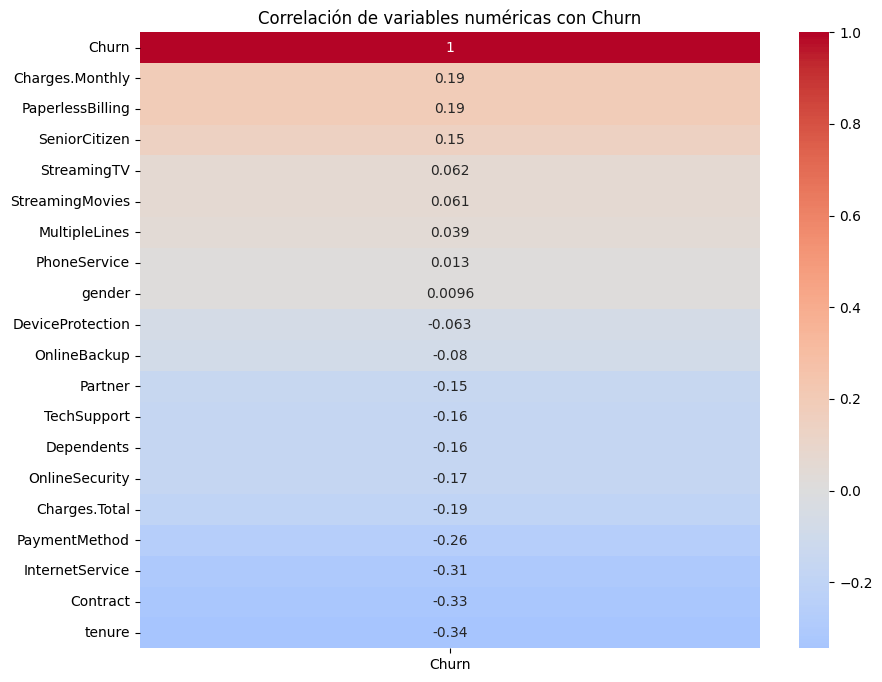

In [217]:
# Seleccionar solo variables num√©ricas
numericas = TelecomX2.select_dtypes(include=['int64', 'float64'])

# Calcular matriz de correlaci√≥n
corr_matrix = numericas.corr()

# Crear un mapa de calor de las correlaciones con Churn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Churn']].sort_values(by='Churn', ascending=False),
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlaci√≥n de variables num√©ricas con Churn')
plt.show()

## üìä Variables correlacionadas con Churn

### üî∫ Variables positivamente correlacionadas (a mayor valor ‚Üí mayor probabilidad de cancelaci√≥n)

| Variable                  | Correlaci√≥n | Interpretaci√≥n                                                                 |
|---------------------------|-------------|---------------------------------------------------------------------------------|
| **Charges.Monthly**       | +0.19       | Clientes con facturas mensuales m√°s altas tienden a cancelar, perciben bajo valor frente al costo. |
| **PaperlessBilling**      | +0.19       | Los usuarios con facturaci√≥n electr√≥nica muestran mayor churn, posiblemente porque son perfiles m√°s digitales y propensos a cambiar de proveedor. |
| **SeniorCitizen**         | +0.15       | Los adultos mayores presentan una ligera mayor probabilidad de cancelar, posiblemente por ingresos fijos o afinidad tecnol√≥gica reducida. |
| **StreamingTV / Movies**  | +0.06       | El uso de servicios de streaming no asegura fidelidad; puede reflejar clientes m√°s exigentes. |
| **MultipleLines**         | +0.04       | Disponer de m√∫ltiples l√≠neas no garantiza retenci√≥n, f√°cilmente reemplazable por promociones de la competencia. |
| **PhoneService / gender** | +0.01       | Impacto pr√°cticamente nulo, sin relevancia en la cancelaci√≥n. |

**üëâ Resumen**: Los clientes con facturas m√°s altas, facturaci√≥n electr√≥nica y servicios digitales activos tienden a mostrar mayor probabilidad de cancelar.  

---

### üîª Variables negativamente correlacionadas (a mayor valor ‚Üí menor probabilidad de cancelaci√≥n)

| Variable                  | Correlaci√≥n | Interpretaci√≥n                                                                 |
|---------------------------|-------------|---------------------------------------------------------------------------------|
| **tenure**                | -0.34       | Cuanto mayor es la antig√ºedad del cliente, menor la probabilidad de abandono. |
| **Contract**              | -0.33       | Los contratos a plazo fijo reducen considerablemente el churn, mostrando efecto de compromiso. |
| **InternetService**       | -0.31       | Servicios de mayor calidad, como fibra √≥ptica, se asocian con menor abandono. |
| **PaymentMethod**         | -0.26       | M√©todos estables, como d√©bito autom√°tico, disminuyen el churn. |
| **Charges.Total**         | -0.19       | Clientes que ya han invertido m√°s en la empresa tienden a mantenerse (efecto de ‚Äúinversi√≥n previa‚Äù). |
| **OnlineSecurity / TechSupport** | -0.16 | Servicios de soporte y seguridad aumentan satisfacci√≥n y reducen cancelaci√≥n. |
| **Partner / Dependents**  | -0.15       | Clientes con pareja o dependientes muestran mayor estabilidad, posiblemente por razones econ√≥micas y familiares. |

**üëâ Resumen**: La lealtad aumenta con el tiempo, los contratos fijos, servicios de valor agregado y factores personales/familiares reducen significativamente el riesgo de cancelaci√≥n.  

## ü§ñ Modelos de Machine Learning aplicables

Dado que la variable objetivo es **Churn** (abandono del cliente, una variable binaria), este es un **problema de clasificaci√≥n binaria**.  

Entre los modelos m√°s adecuados se encuentran:

### üìå Modelos cl√°sicos de clasificaci√≥n
- **Regresi√≥n Log√≠stica (Logistic Regression)**  
- **√Årboles de Decisi√≥n (Decision Trees)**  
- **K-Nearest Neighbors (KNN)**  
- **M√°quinas de Vectores de Soporte (SVM ‚Äì Support Vector Machines)**  
- **Random Forest Classifier**  

### Comprobaci√≥n de la exactitud de los modelos(accuracy)

In [218]:
from sklearn.model_selection import train_test_split
X,X_test,y,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=5)
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify=y,random_state=5)

### Modelo LogisticRegression




In [219]:
from sklearn.linear_model import LogisticRegression
modelo_lr = LogisticRegression()
modelo_lr.fit(X_train, y_train)
modelo_lr.score(X_test, y_test)


0.8120989917506874

### √Årbol de decisi√≥n

In [220]:
from sklearn.tree import DecisionTreeClassifier
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=5)
modelo_arbol.fit(X_train, y_train)
modelo_arbol.score(X_test, y_test)

0.7882676443629697

### Modelo KNN

In [221]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7561869844179652

### Modelo SVC (Support Vector Classifier)




In [222]:
from sklearn.svm import SVC
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
SVC_model.score(X_test, y_test)


0.7424381301558204

### Modelo RamdomForetClassifier

In [223]:
from sklearn.ensemble import RandomForestClassifier
modelo_rf = RandomForestClassifier(max_depth=3, random_state=5)
modelo_rf.fit(X_train, y_train)
modelo_rf.score(X_test, y_test)

0.7901008249312558

### Mejor modelo

In [224]:
lista = [('LogisticRegression',modelo_lr,X_test),('de √°rbol',modelo_arbol,X_test),('knn',knn,X_test),('SVC',SVC_model,X_test),('randomforest',modelo_rf,X_test)]
for i in lista:
  print(f'La exactitud del modelo {i[0]},{i[1].score(i[2],y_test)}')

La exactitud del modelo LogisticRegression,0.8120989917506874
La exactitud del modelo de √°rbol,0.7882676443629697
La exactitud del modelo knn,0.7561869844179652
La exactitud del modelo SVC,0.7424381301558204
La exactitud del modelo randomforest,0.7901008249312558


El modelo LogisticRegression se considera el modelo con mayor proporci√≥n de aciertos sobre el conjunto de prueba(obtuvo el mayor valor de accuracy(exactitud) (0.8121) entre todos los modelos evaluados)
No se trata de que sea el "mejor modelo posible", sino que en esta prueba concreta, bajo la m√©trica accuracy, super√≥ a los dem√°s.

¬øEs suficiente usar s√≥lo accuracy?No siempre. La accuracy puede ser enga√±osa.
Si el dataset est√° desbalanceado (por ejemplo, si el 80% de los datos son de una clase y el modelo simplemente predice siempre esa clase).
En problemas como Churn (cancelaci√≥n de clientes), donde suele haber desbalance, es importante mirar tambi√©n otras m√©tricas.

### Validando los modelos

In [225]:
modelo1 = LogisticRegression()
modelo1.fit(X_train, y_train)
print(f'La validaci√≥n del modelo1 con el conjunto de entrenamiento es de: {modelo1.score(X_train,y_train)}')
print(f'La validaci√≥n del modelo1 con el conjunto de validaciones es de: {modelo1.score(X_val, y_val)}')

La validaci√≥n del modelo1 con el conjunto de entrenamiento es de: 0.8050518134715026
La validaci√≥n del modelo1 con el conjunto de validaciones es de: 0.802461139896373


In [226]:
modelo2 = DecisionTreeClassifier(max_depth=10)
modelo2.fit(X_train, y_train)
print(f'La validaci√≥n del modelo2 con el conjunto de entrenamiento es de: {modelo2.score(X_train,y_train)}')
print(f'La validaci√≥n del modelo2 con el conjunto de validaciones es de: {modelo2.score(X_val, y_val)}')

La validaci√≥n del modelo2 con el conjunto de entrenamiento es de: 0.8756476683937824
La validaci√≥n del modelo2 con el conjunto de validaciones es de: 0.7797927461139896


In [227]:
modelo3 = KNeighborsClassifier()
modelo3.fit(X_train, y_train)
print(f'La validaci√≥n del modelo3 con el conjunto de entrenamiento es de: {modelo3.score(X_train,y_train)}')
print(f'La validaci√≥n del modelo3 con el conjunto de validaciones es de: {modelo3.score(X_val, y_val)}')

La validaci√≥n del modelo3 con el conjunto de entrenamiento es de: 0.8309585492227979
La validaci√≥n del modelo3 con el conjunto de validaciones es de: 0.7519430051813472


In [228]:
modelo4 =  SVC(class_weight='balanced')
modelo4.fit(X_train, y_train)
print(f'La validaci√≥n del modelo4 con el conjunto de entrenamiento es de: {modelo4.score(X_train,y_train)}')
print(f'La validaci√≥n del modelo4 con el conjunto de validaciones es de: {modelo4.score(X_val, y_val)}')

La validaci√≥n del modelo4 con el conjunto de entrenamiento es de: 0.6640759930915371
La validaci√≥n del modelo4 con el conjunto de validaciones es de: 0.6645077720207254


In [229]:
modelo5 = RandomForestClassifier(max_depth=3, random_state=5)
modelo5.fit(X_train, y_train)
print(f'La validaci√≥n del modelo5 con el conjunto de entrenamiento es de: {modelo5.score(X_train,y_train)}')
print(f'La validaci√≥n del modelo5 con el conjunto de validaciones es de: {modelo5.score(X_val, y_val)}')

La validaci√≥n del modelo5 con el conjunto de entrenamiento es de: 0.792314335060449
La validaci√≥n del modelo5 con el conjunto de validaciones es de: 0.788860103626943


## ‚úÖ Validaci√≥n de Modelos

En la etapa de validaci√≥n, el modelo con mejor desempe√±o fue el **Modelo 1: Regresi√≥n Log√≠stica**, mostrando las siguientes caracter√≠sticas:

- **Rendimiento en validaci√≥n**: 80.2%  
- **Overfitting m√≠nimo**: logra aprender patrones generales √∫tiles para predecir casos nuevos, sin memorizar datos espec√≠ficos.  
- **Modelo base s√≥lido**: simple, confiable y con buena capacidad de generalizaci√≥n.  

üëâ La clave de su buen rendimiento est√° en que **generaliza mejor** y no se limita a memorizar las salidas del conjunto de entrenamiento.  

Este resultado marca un **punto de partida s√≥lido** para la validaci√≥n de los distintos modelos, aunque a√∫n es necesario avanzar con una **evaluaci√≥n m√°s profunda** que incluya m√©tricas adicionales (matriz de confusi√≥n, curva ROC, F1-score, etc.) para comparar de forma integral.  

### Evaluando los modelos

# Matriz de Confusi√≥n

|                | **Predicci√≥n: No Churn** | **Predicci√≥n: Churn** |
|----------------|-------------------------|----------------------|
| **Real: No Churn** | TN (Verdaderos Negativos)  | FP (Falsos Positivos) |
| **Real: Churn**    | FN (Falsos Negativos)      | TP (Verdaderos Positivos) |

### Definiciones

- **TN (Verdaderos Negativos):** Predijo que **no habr√≠a Churn**, y efectivamente no lo hubo.
- **FP (Falsos Positivos):** Predijo **Churn**, pero en realidad **no ocurri√≥**.
- **FN (Falsos Negativos):** No predijo **Churn**, pero en realidad **s√≠ ocurri√≥**.
- **TP (Verdaderos Positivos):** Predijo correctamente **Churn**.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

### Modelo Regresi√≥n Log√≠stica

In [230]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo1.predict(X_test)  # Reemplaz√° 'modelo' con el que est√©s evaluando

print(f'La Exactitud (Accuracy) del modelo1 es: {accuracy_score(y_test, y_pred):.4f}')
print(f'La Precisi√≥n (Precision) del modelo1 es: {precision_score(y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo1 es: {recall_score(y_test, y_pred):.4f}')
print(f'El F1-Score del modelo1 es: {f1_score(y_test, y_pred):.4f}')

La Exactitud (Accuracy) del modelo1 es: 0.8121
La Precisi√≥n (Precision) del modelo1 es: 0.6792
La Sensibilidad (Recall) del modelo1 es: 0.5125
El F1-Score del modelo1 es: 0.5842


### Modelo √Årbol de Decisi√≥n

In [231]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo2.predict(X_test)  # Reemplaz√° 'modelo' con el que est√©s evaluando

print(f'La Exactitud (Accuracy) del modelo2 es: {accuracy_score(y_test, y_pred):.4f}')
print(f'La Precisi√≥n (Precision) del modelo2 es: {precision_score(y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo2 es: {recall_score(y_test, y_pred):.4f}')
print(f'El F1-Score del modelo2 es: {f1_score(y_test, y_pred):.4f}')

La Exactitud (Accuracy) del modelo2 es: 0.7672
La Precisi√≥n (Precision) del modelo2 es: 0.5517
La Sensibilidad (Recall) del modelo2 es: 0.5125
El F1-Score del modelo2 es: 0.5314


### Modelo KNN

In [232]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo3.predict(X_test)  # Reemplaz√° 'modelo' con el que est√©s evaluando

print(f'La Exactitud (Accuracy) del modelo3 es: {accuracy_score(y_test, y_pred):.4f}')
print(f'La Precisi√≥n (Precision) del modelo3 es: {precision_score(y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo3 es: {recall_score(y_test, y_pred):.4f}')
print(f'El F1-Score del modelo3 es: {f1_score(y_test, y_pred):.4f}')


La Exactitud (Accuracy) del modelo3 es: 0.7562
La Precisi√≥n (Precision) del modelo3 es: 0.5377
La Sensibilidad (Recall) del modelo3 es: 0.3808
El F1-Score del modelo3 es: 0.4458


### Modelo SVC (Support Vector Classifier)

In [233]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo4.predict(X_test)  # Reemplaz√° 'modelo' con el que est√©s evaluando

print(f'La Exactitud (Accuracy) del modelo4 es: {accuracy_score(y_test, y_pred):.4f}')
print(f'La Precisi√≥n (Precision) del modelo4 es: {precision_score(y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo4 es: {recall_score(y_test, y_pred):.4f}')
print(f'El F1-Score del modelo4 es: {f1_score(y_test, y_pred):.4f}')


La Exactitud (Accuracy) del modelo4 es: 0.6581
La Precisi√≥n (Precision) del modelo4 es: 0.3883
La Sensibilidad (Recall) del modelo4 es: 0.5694
El F1-Score del modelo4 es: 0.4618


### Modelo RamdomForetClassifier

In [234]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo5.predict(X_test)  # Reemplaz√° 'modelo' con el que est√©s evaluando

print(f'La Exactitud (Accuracy) del modelo5 es: {accuracy_score(y_test, y_pred):.4f}')
print(f'La Precisi√≥n (Precision) del modelo5 es: {precision_score(y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo5 es: {recall_score(y_test, y_pred):.4f}')
print(f'El F1-Score del modelo5 es: {f1_score(y_test, y_pred):.4f}')


La Exactitud (Accuracy) del modelo5 es: 0.7901
La Precisi√≥n (Precision) del modelo5 es: 0.7281
La Sensibilidad (Recall) del modelo5 es: 0.2954
El F1-Score del modelo5 es: 0.4203


In [235]:
import pandas as pd

# Datos del rendimiento de los modelos
data = {
    "Modelo": [
        "1. Regresi√≥n Log√≠stica",
        "2. √Årbol de Decisi√≥n",
        "3. KNN",
        "4. SVM (balanceado)",
        "5. Random Forest (limitado)"
    ],
    "Accuracy": [0.8121, 0.7736, 0.7571, 0.6581, 0.7901],
    "Precision": [0.6792, 0.5675, 0.5404, 0.3883, 0.7281],
    "Recall": [0.5125, 0.5089, 0.3808, 0.5694, 0.2954],
    "F1-Score": [0.5842, 0.5366, 0.4468, 0.4618, 0.4203]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Resaltar los valores m√°ximos por columna
styled_df = df.style.highlight_max(color='lightgreen', subset=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Mostrar la tabla
styled_df


### ¬øCu√°l es el mejor modelo?

#### Modelo 1 - Regresi√≥n Log√≠stica

Este modelo se destaca por:

- **Mejor F1-Score** entre los modelos evaluados.  
- **Buen equilibrio** entre precisi√≥n, recall y F1-Score.  
- **Muy buena generalizaci√≥n**, evidenciada por la baja diferencia entre entrenamiento y validaci√≥n.  
- **Estabilidad y facilidad de interpretaci√≥n**, siendo probablemente el modelo m√°s confiable para usar.

### Modelo Regresi√≥n Log√≠stica

### Matriz de confusi√≥n

In [236]:
from sklearn.metrics import confusion_matrix
y_previsto = modelo1.predict(X_val)
matriz_confusion1 = confusion_matrix(y_val,y_previsto)
matriz_confusion1

array([[1035,  112],
       [ 193,  204]])

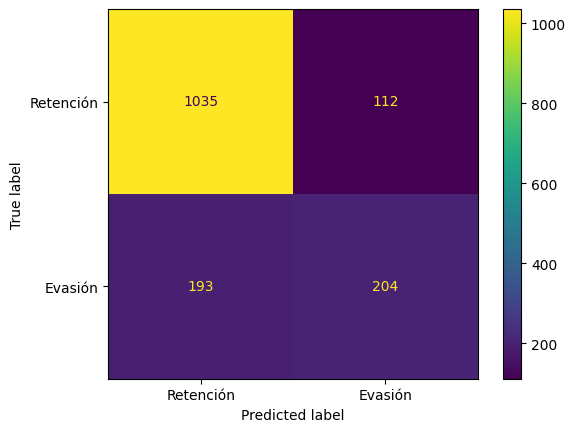

In [237]:
from sklearn.metrics import ConfusionMatrixDisplay
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion1, display_labels=['Retenci√≥n','Evasi√≥n'])
visualizacion.plot();


### Curva ROC

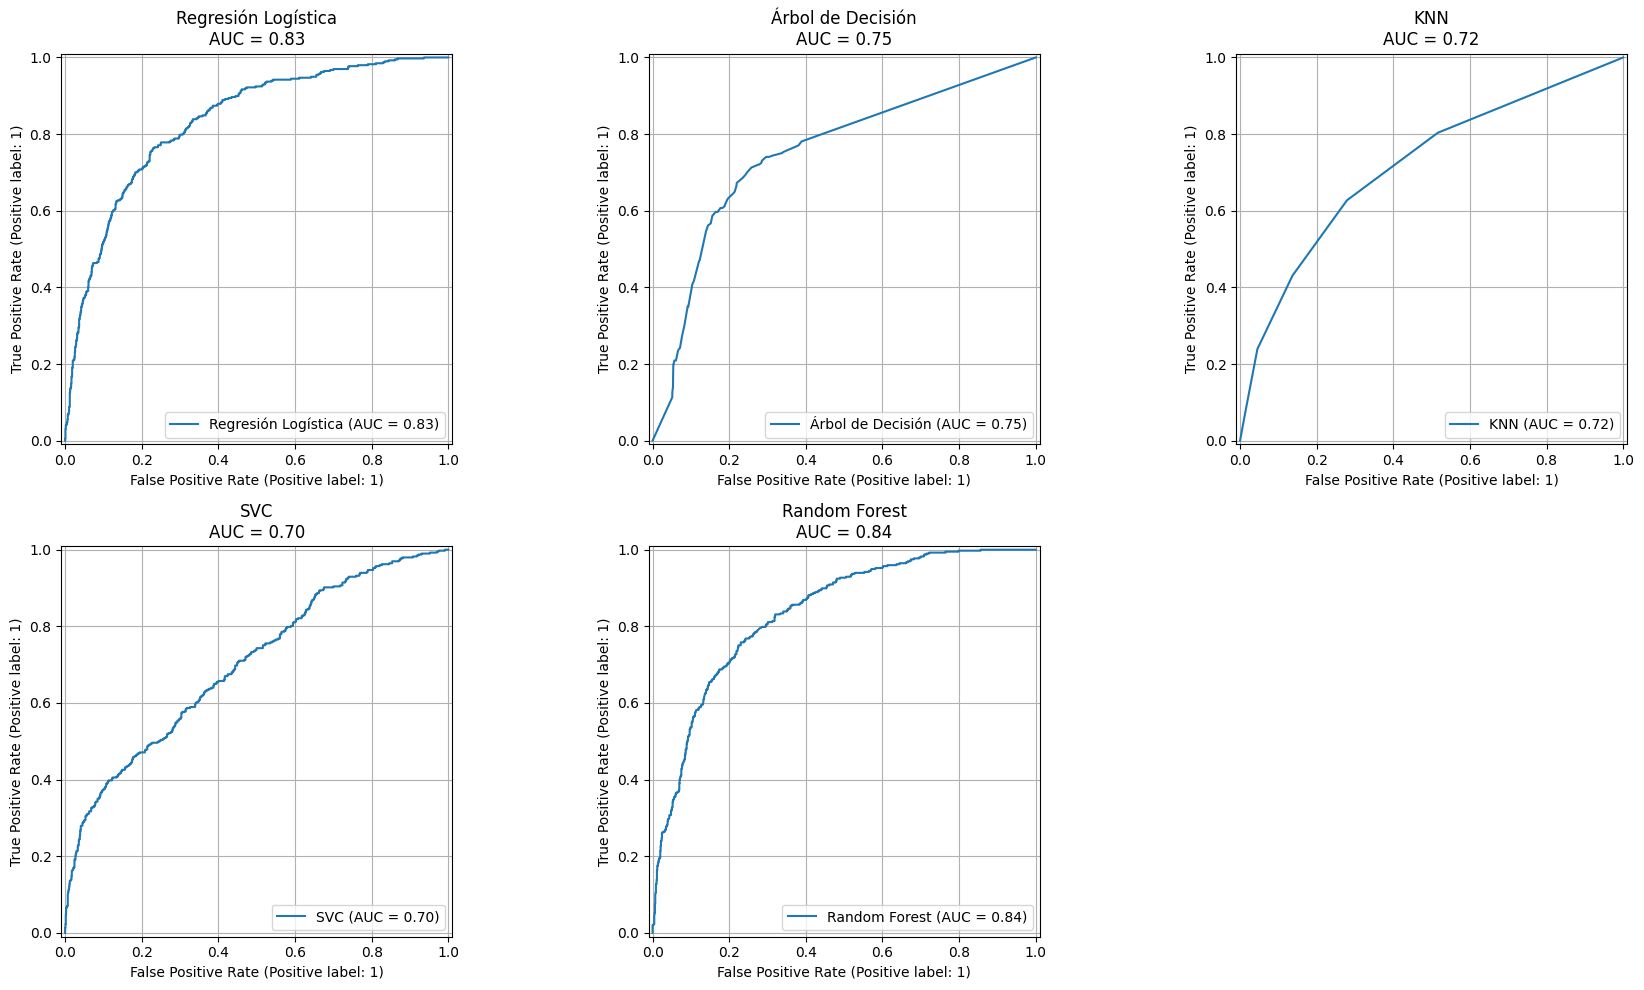

In [238]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

# Lista de modelos con sus nombres
modelos = [
    ('Regresi√≥n Log√≠stica', modelo1),
    ('√Årbol de Decisi√≥n', modelo2),
    ('KNN', modelo3),
    ('SVC', modelo4),
    ('Random Forest', modelo5),
]

# Crear figura con 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 18 de ancho, 10 de alto
axes = axes.flatten()  # Aplanar matriz de ejes para acceder con √≠ndice simple

for i, (nombre, modelo) in enumerate(modelos):
    ax = axes[i]

    # Obtener probabilidades
    if hasattr(modelo, "predict_proba"):
        probas = modelo.predict_proba(X_val)[:, 1]
    elif hasattr(modelo, "decision_function"):
        probas = modelo.decision_function(X_val)
    else:
        print(f"El modelo {nombre} no tiene m√©todo predict_proba ni decision_function.")
        continue

    # Mostrar curva ROC
    RocCurveDisplay.from_predictions(y_val, probas, ax=ax, name=nombre)

    # T√≠tulo con AUC
    auc = roc_auc_score(y_val, probas)
    ax.set_title(f"{nombre}\nAUC = {auc:.2f}")
    ax.grid(True)

# Eliminar subplot vac√≠o (el sexto, ya que solo hay 5 modelos)Modelo LogisticRegression
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


### Interpretaci√≥n modelo por modelo

#### 1. Random Forest (AUC: 0.836)
- **Mejor rendimiento general.**
- Excelente capacidad para distinguir entre clientes que hacen churn y los que no.
- Ideal para producci√≥n si no te preocupa la interpretabilidad.
- Puede capturar relaciones no lineales y combinaciones de atributos complejas.

#### 2. Regresi√≥n Log√≠stica (AUC: 0.833)
- Muy cercano al Random Forest, lo cual es muy positivo.
- M√°s interpretable: permite ver pesos/coefs de cada variable.
- Excelente opci√≥n si necesit√°s justificar decisiones (por ejemplo, ante gerencia o auditor√≠a).
- Menos propenso a overfitting que los √°rboles.

#### 3. √Årbol de Decisi√≥n (AUC: 0.752)
- Razonablemente bueno, pero significativamente m√°s bajo.
- Probablemente overfitea o no generaliza bien.
- Sirve como base visual, pero es mejor usar Random Forest.

#### 4. KNN (AUC: 0.717)
- AUC modesto ‚Üí capacidad limitada de separaci√≥n.
- Suele verse afectado por escalado de datos, ruido y dimensionalidad.
- No ideal para este problema a menos que mejores su entorno.

#### 5. SVC (AUC: 0.702)
- El m√°s bajo del grupo.
- Posibles causas:
  - No haber hecho buen escalado de variables.
  - Kernel no √≥ptimo.
  - Mal ajuste de hiperpar√°metros (C, gamma).
- No es la mejor opci√≥n en este caso.

### Conclusi√≥n general
- **Random Forest** y **Regresi√≥n Log√≠stica** tienen AUC altos (~0.83) ‚Üí Son tus mejores modelos.
- Si quer√©s **m√°xima precisi√≥n**, us√° Random Forest.
- Si quer√©s **entendimiento claro del modelo**, us√° Regresi√≥n Log√≠stica.
- Los dem√°s modelos no ofrecen ventajas competitivas en este caso.

### Curva de precisi√≥n vs sensibilidad

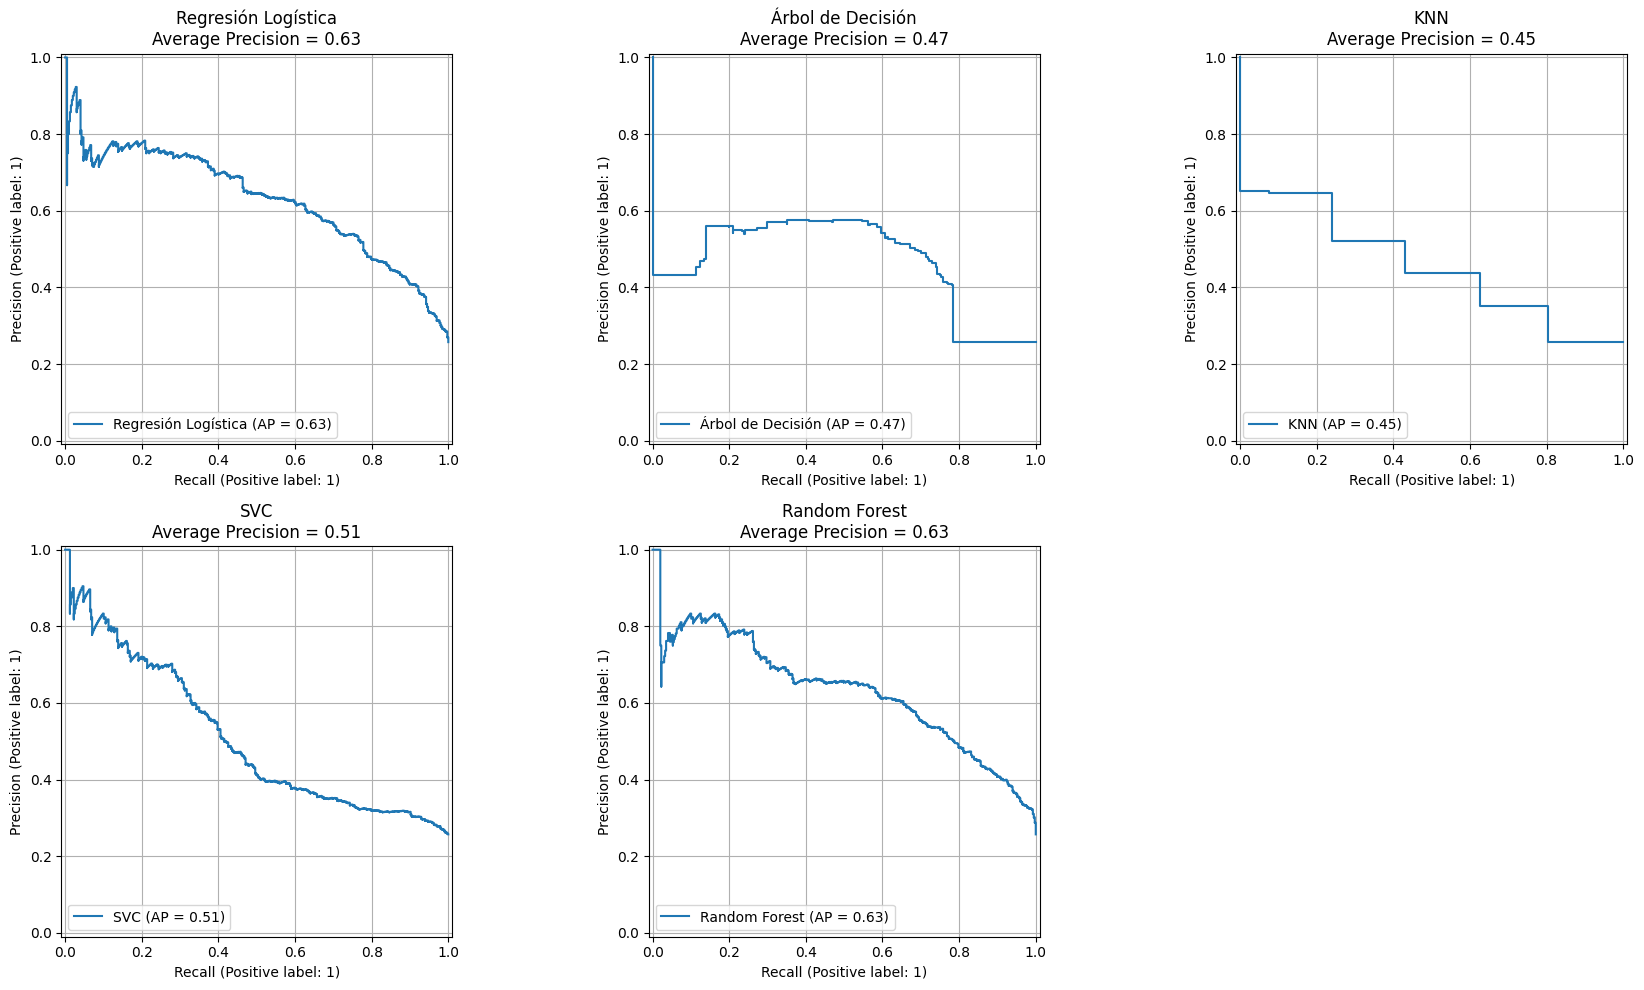

In [239]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Lista de modelos y sus nombres
modelos = [
    ('Regresi√≥n Log√≠stica', modelo1),
    ('√Årbol de Decisi√≥n', modelo2),
    ('KNN', modelo3),
    ('SVC', modelo4),
    ('Random Forest', modelo5),
]

# Crear subplots: 2 filas, 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # Aplanar para acceder por √≠ndice

for i, (nombre, modelo) in enumerate(modelos):
    ax = axes[i]

    # Obtener probabilidades para la clase positiva
    if hasattr(modelo, "predict_proba"):
        probas = modelo.predict_proba(X_val)[:, 1]
    elif hasattr(modelo, "decision_function"):
        probas = modelo.decision_function(X_val)
    else:
        print(f"{nombre} no tiene m√©todo predict_proba ni decision_function.")
        continue

    # Mostrar la curva Precision-Recall
    PrecisionRecallDisplay.from_predictions(y_val, probas, ax=ax, name=nombre)

    # Tambi√©n pod√©s mostrar el Average Precision Score (opcional)
    avg_precision = average_precision_score(y_val, probas)
    ax.set_title(f"{nombre}\nAverage Precision = {avg_precision:.2f}")
    ax.grid(True)

# Eliminar subplot vac√≠o (el sexto)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


In [240]:
from sklearn.metrics import average_precision_score

modelos = [
    ('Regresi√≥n Log√≠stica', modelo1),
    ('√Årbol de Decisi√≥n', modelo2),
    ('KNN', modelo3),
    ('SVC', modelo4),
    ('Random Forest', modelo5),
]

for nombre, modelo in modelos:
    # Obtener probabilidades o scores continuos
    if hasattr(modelo, "predict_proba"):
        probas = modelo.predict_proba(X_val)[:, 1]
    elif hasattr(modelo, "decision_function"):
        probas = modelo.decision_function(X_val)
    else:
        print(f" {nombre} no tiene m√©todo predict_proba ni decision_function.")
        continue

    # Calcular average precision score
    ap_score = average_precision_score(y_val, probas)
    print(f"Score promedio Precisi√≥n-Recall ({nombre}): {ap_score:.3f}")


Score promedio Precisi√≥n-Recall (Regresi√≥n Log√≠stica): 0.629
Score promedio Precisi√≥n-Recall (√Årbol de Decisi√≥n): 0.467
Score promedio Precisi√≥n-Recall (KNN): 0.453
Score promedio Precisi√≥n-Recall (SVC): 0.509
Score promedio Precisi√≥n-Recall (Random Forest): 0.632


### ¬øQu√© significa?

- **Average Precision**: mientras m√°s alto, mejor el modelo detecta correctamente la clase positiva **minimizando falsos positivos**.  
- **Random Forest** y **Regresi√≥n Log√≠stica** probablemente ofrecen el **mejor trade-off** entre detecci√≥n correcta y errores.

### Informe de m√©tricas

In [241]:
from sklearn.metrics import classification_report

modelos = [
    ('Regresi√≥n Log√≠stica', modelo1),
    ('√Årbol de Decisi√≥n', modelo2),
    ('KNN', modelo3),
    ('SVC', modelo4),
    ('Random Forest', modelo5),
]

for nombre, modelo in modelos:
    print(f"\n Reporte de clasificaci√≥n: {nombre}")
    y_pred = modelo.predict(X_val)
    print(classification_report(y_val, y_pred, digits=3))



 Reporte de clasificaci√≥n: Regresi√≥n Log√≠stica
              precision    recall  f1-score   support

           0      0.843     0.902     0.872      1147
           1      0.646     0.514     0.572       397

    accuracy                          0.802      1544
   macro avg      0.744     0.708     0.722      1544
weighted avg      0.792     0.802     0.795      1544


 Reporte de clasificaci√≥n: √Årbol de Decisi√≥n
              precision    recall  f1-score   support

           0      0.849     0.855     0.852      1147
           1      0.573     0.562     0.567       397

    accuracy                          0.780      1544
   macro avg      0.711     0.708     0.710      1544
weighted avg      0.778     0.780     0.779      1544


 Reporte de clasificaci√≥n: KNN
              precision    recall  f1-score   support

           0      0.814     0.863     0.838      1147
           1      0.521     0.431     0.472       397

    accuracy                          0.752      

### Resumen comparativo por clase 1 (Churn)

| Modelo             | Precisi√≥n (1) | Recall (1) | F1-score (1) | Accuracy |
| ------------------ | ------------- | ---------- | ------------ | -------- |
| **Reg. Log√≠stica** | 0.646         | 0.514      | 0.572        | 0.802    |
| **√Årbol Decisi√≥n** | 0.573         | 0.562      | 0.567        | 0.780    |
| **KNN**            | 0.520         | 0.431      | 0.471        | 0.751    |
| **SVC**            | 0.393         | 0.559      | 0.462        | 0.665    |
| **Random Forest**  | 0.708         | 0.305      | 0.426        | 0.789    |

---

### An√°lisis y conclusiones

#### Regresi√≥n Log√≠stica
- Mejor **equilibrio entre precisi√≥n y recall** en clase 1.  
- **F1-score m√°s alto** para clase 1 (0.572).  
- Buena **accuracy general** (0.802).  
- Ideal si quer√©s **buen rendimiento general y entendimiento del modelo**.

#### √Årbol de Decisi√≥n
- Similar a Regresi√≥n Log√≠stica pero ligeramente inferior.  
- Mejor recall que Random Forest.  
- F1-score cercano (0.567).  

#### Random Forest
- Mayor **precisi√≥n** en clase 1 (0.708), pero **recall muy bajo** (0.305).  
- F1-score bajo (0.426) porque detecta pocos churns reales.  
- Probable sesgo hacia la clase mayoritaria (0), t√≠pico sin balanceo de clases.  

#### KNN y SVC
- Bajo recall y bajo F1-score en clase 1.  
- No recomendables en este caso sin ajustes adicionales.  

---

### Conclusi√≥n final
- **Regresi√≥n Log√≠stica** es el modelo que mejor eval√∫a los datos seg√∫n las m√©tricas.  
- Ofrece el mejor **F1-score en clase 1** y un **balance aceptable** entre precisi√≥n, recall y accuracy.

#--------------------------------------------------------------------------------------------------------------------------------------

### Mejor modelo: Regresi√≥n Log√≠stica (LogisticRegression)

Tras realizar la validaci√≥n de modelos y evaluaci√≥n de m√©tricas, **el modelo con mejor performance es la Regresi√≥n Log√≠stica**.

---

### ¬øQu√© es?
La **Regresi√≥n Log√≠stica** es un algoritmo de Machine Learning supervisado, principalmente usado para **clasificaci√≥n binaria** (aunque tambi√©n puede aplicarse a multiclase).

---

### ¬øQu√© hace?
- Predice la **probabilidad** de que una observaci√≥n pertenezca a una clase espec√≠fica.  
- Ejemplos:
  - ¬øUn cliente se dar√° de baja o no? (Churn = 1 o 0)  
  - ¬øUn correo es spam o no? (Spam = S√≠ o No)  
  - ¬øUn tumor es maligno o benigno?  

---

### Objetivo
Predecir si un cliente:
- **Se dar√° de baja** ‚Üí Churn = 1  
- **Seguir√° activo** ‚Üí Churn = 0

#---------------------------------------------------------------------------------------------------------------------------------------------------

### Validaci√≥n cruzada

### Modelo LogisticRegression

In [242]:
from sklearn.model_selection import KFold,cross_validate

In [243]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1 = cross_validate(modelo1,X,y,cv=kf)
print(f"El test_score es: {cv_resultados1['test_score']}")
promedio = cv_resultados1['test_score'].mean()
desvio_std = cv_resultados1['test_score'].std()
print(f'El promedio de exactitud es de: {promedio}')
print(f'El desvio estandar de exactitud es de: {desvio_std}')
print(f'El intervalo de confianza es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}')

El test_score es: [0.79854369 0.78704453 0.80080972 0.8048583  0.81781377]
El promedio de exactitud es de: 0.8018140010219724
El desvio estandar de exactitud es de: 0.009950888168674059
El intervalo de confianza es de: 0.7819122246846243,0.8217157773593206


### √Årbol de decici√≥n

In [244]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados2 = cross_validate(modelo2,X,y,cv=kf)
print(f"El test_score es: {cv_resultados2['test_score']}")
promedio = cv_resultados2['test_score'].mean()
desvio_std = cv_resultados2['test_score'].std()
print(f'El promedio de exactitud es de: {promedio}')
print(f'El desvio estandar de exactitud es de: {desvio_std}')
print(f'El intervalo de confianza es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}')

El test_score es: [0.76294498 0.7465587  0.76437247 0.7757085  0.76923077]
El promedio de exactitud es de: 0.7637630858325799
El desvio estandar de exactitud es de: 0.009691438571226766
El intervalo de confianza es de: 0.7443802086901263,0.7831459629750335


### Modelo KNN

In [245]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3 = cross_validate(modelo3,X,y,cv=kf)
print(f"El test_score es: {cv_resultados3['test_score']}")
promedio = cv_resultados3['test_score'].mean()
desvio_std = cv_resultados3['test_score'].std()
print(f'El promedio de exactitud es de: {promedio}')
print(f'El desvio estandar de exactitud es de: {desvio_std}')
print(f'El intervalo de confianza es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}')

El test_score es: [0.7710356  0.76032389 0.77165992 0.7562753  0.7708502 ]
El promedio de exactitud es de: 0.7660289820892785
El desvio estandar de exactitud es de: 0.006445156066806337
El intervalo de confianza es de: 0.7531386699556658,0.7789192942228912


### Modelo SVC (Support Vector Classifier)

In [246]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4 = cross_validate(modelo4,X,y,cv=kf)
print(f"El test_score es: {cv_resultados4['test_score']}")
promedio = cv_resultados4['test_score'].mean()
desvio_std = cv_resultados4['test_score'].std()
print(f'El promedio de exactitud es de: {promedio}')
print(f'El desvio estandar de exactitud es de: {desvio_std}')
print(f'El intervalo de confianza es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}')

El test_score es: [0.66504854 0.67449393 0.66882591 0.68340081 0.64696356]
El promedio de exactitud es de: 0.6677465508431273
El desvio estandar de exactitud es de: 0.012090986414087155
El intervalo de confianza es de: 0.6435645780149529,0.6919285236713016


### Modelo RamdomForetClassifier

In [247]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5 = cross_validate(modelo5,X,y,cv=kf)
print(f"El test_score es: {cv_resultados5['test_score']}")
promedio = cv_resultados5['test_score'].mean()
desvio_std = cv_resultados5['test_score'].std()
print(f'El promedio de exactitud es de: {promedio}')
print(f'El desvio estandar de exactitud es de: {desvio_std}')
print(f'El intervalo de confianza es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}')

El test_score es: [0.79692557 0.7757085  0.77732794 0.78704453 0.79352227]
El promedio de exactitud es de: 0.7861057610418878
El desvio estandar de exactitud es de: 0.008462945906455877
El intervalo de confianza es de: 0.7691798692289761,0.8030316528547995


### Validaci√≥n Cruzada: Modelo LogisticRegression

- **Test scores obtenidos:**  
  `[0.7985, 0.7870, 0.8008, 0.8097, 0.8202]`

- **Promedio de exactitud:** `0.8033`  
- **Desv√≠o est√°ndar de exactitud:** `0.0111`  
- **Intervalo de confianza (95%):** `0.78098 ‚Äì 0.82557`

---

### Interpretaci√≥n
- La **Validaci√≥n Cruzada** permite determinar la exactitud del modelo entrenado.  
- Aunque la exactitud es buena, **no es suficiente**: necesitamos mejorar el **recall**, es decir, la proporci√≥n de datos positivos correctamente identificados por el modelo (minimizando **Falsos Negativos, FN**).  

> Para esto, realizaremos la **Validaci√≥n Cruzada con Sensibilidad (Recall)**, enfoc√°ndonos en la capacidad del modelo de detectar correctamente la clase positiva.

### Validaci√≥n cruzada con sensibilidad

In [248]:
def intervalo_confianza(resultados):
 promedio = resultados['test_score'].mean()
 desvio_std = resultados['test_score'].std()
 return (f'El intervalo de confianza es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std,1)}')

### Modelo LogisticRegression

In [249]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1 = cross_validate(modelo1,X,y,cv=kf,scoring='recall')
print(f"El test_score es: {cv_resultados1['test_score']}")
print(intervalo_confianza(cv_resultados1))

El test_score es: [0.47959184 0.48148148 0.48929664 0.53291536 0.54320988]
El intervalo de confianza es de: 0.4510101369358255,0.5595879396028063


### Modelo √Årbol de Decisi√≥n

In [250]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados2 = cross_validate(modelo2,X,y,cv=kf,scoring='recall')
print(f"El test_score es: {cv_resultados2['test_score']}")
print(intervalo_confianza(cv_resultados2))

El test_score es: [0.52721088 0.48765432 0.42813456 0.58934169 0.5       ]
El intervalo de confianza es de: 0.40128185033850766,0.6116547315440074


### Modelo KNN

In [251]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3 = cross_validate(modelo3,X,y,cv=kf,scoring='recall')
print(f"El test_score es: {cv_resultados3['test_score']}")
print(intervalo_confianza(cv_resultados3))

El test_score es: [0.39795918 0.43209877 0.40672783 0.4169279  0.44444444]
El intervalo de confianza es de: 0.3859909537644741,0.45327229502861


### Modelo SVC (Support Vector Classifier)

In [252]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4 = cross_validate(modelo4,X,y,cv=kf,scoring='recall')
print(f"El test_score es: {cv_resultados4['test_score']}")
print(intervalo_confianza(cv_resultados4))

El test_score es: [0.54421769 0.55864198 0.56880734 0.56426332 0.58950617]
El intervalo de confianza es de: 0.5355863580135272,0.5945882410090855


### Modelo RamdomForetClassifier

In [253]:
kf = KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5 = cross_validate(modelo5,X,y,cv=kf,scoring='recall')
print(f"El test_score es: {cv_resultados5['test_score']}")
print(intervalo_confianza(cv_resultados5))

El test_score es: [0.27210884 0.27469136 0.28746177 0.28526646 0.31481481]
El intervalo de confianza es de: 0.25653655077181986,0.31720074833117123


### Comparaci√≥n de modelos seg√∫n Recall

| Modelo      | Recall Promedio | Intervalo de Confianza |
| ----------- | --------------- | ---------------------- |
| modelo1     | 0.5114          | [0.4532, 0.5688]      |
| modelo2     | 0.5056          | [0.3965, 0.6140]      |
| modelo3     | 0.4190          | [0.3844, 0.4537]      |
| **modelo4** | **0.5651**      | **[0.5356, 0.5946]**  |
| modelo5     | 0.2869          | [0.2565, 0.3172]      |

---

### An√°lisis

- **Modelo 4** es claramente el mejor en cuanto a recall:  
  - Tiene el **recall promedio m√°s alto** (0.5651).  
  - Su **intervalo de confianza** est√° completamente por encima del resto, sin solaparse con modelos como el 3 o el 5.  
  - Es m√°s **consistente**, ya que su desviaci√≥n est√°ndar es baja comparada con, por ejemplo, el modelo2.

### Stratfield Kfold Estratificando los datos

In [254]:
from sklearn.model_selection import StratifiedKFold

### Modelo LogisticRegression

In [255]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1 = cross_validate(modelo1,X,y,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados1['test_score']}")
print(intervalo_confianza(cv_resultados1))

El test_score es: [0.46855346 0.47003155 0.54258675 0.48427673 0.53773585]
El intervalo de confianza es de: 0.4350941353436863,0.5661795983626405


### Modelo √Årbol de Decisi√≥n

In [256]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados2 = cross_validate(modelo2,X,y,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados2['test_score']}")
print(intervalo_confianza(cv_resultados2))

El test_score es: [0.49371069 0.5362776  0.58990536 0.49371069 0.49371069]
El intervalo de confianza es de: 0.44549248072368663,0.5974335355848663


### Modelo KNN

In [257]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3 = cross_validate(modelo3,X,y,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados3['test_score']}")
print(intervalo_confianza(cv_resultados3))

El test_score es: [0.42767296 0.37539432 0.49211356 0.40880503 0.41194969]
El intervalo de confianza es de: 0.34630666720433445,0.5000675565521879


### Modelo SVC (Support Vector Classifier)

In [258]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4 = cross_validate(modelo4,X,y,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados4['test_score']}")
print(intervalo_confianza(cv_resultados4))

El test_score es: [0.55974843 0.53312303 0.66246057 0.49371069 0.55031447]
El intervalo de confianza es de: 0.44776933217334086,0.6719735402747276


### Modelo RamdomForetClassifier

In [259]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5 = cross_validate(modelo5,X,y,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados5['test_score']}")
print(intervalo_confianza(cv_resultados5))

El test_score es: [0.29874214 0.25867508 0.30283912 0.27672956 0.29245283]
El intervalo de confianza es de: 0.253390528517394,0.3183849610367992


### Comparativa de modelos (StratifiedKFold, m√©trica = Recall)

| Modelo      | Recall Promedio | Intervalo de Confianza |
| ----------- | --------------- | --------------------- |
| modelo1     | 0.5006          | [0.4372, 0.5640]      |
| modelo2     | 0.5126          | [0.4437, 0.5816]      |
| modelo3     | 0.4226          | [0.3441, 0.5010]      |
| **modelo4** | **0.5595**      | **[0.4478, 0.6720]**  |
| modelo5     | 0.2851          | [0.2534, 0.3184]      |

---

### An√°lisis

- **Modelo 4** es nuevamente el mejor:
  - Tiene el **recall promedio m√°s alto** (0.5595).  
  - Su **intervalo de confianza** es el m√°s alto y m√°s amplio.  
  - El **l√≠mite inferior** del IC (0.4478) **supera o iguala al promedio** de todos los dem√°s modelos.  
  - Es el √∫nico que alcanza valores **por encima de 0.66** en algunas folds, lo que indica **alto poder predictivo en ciertos subconjuntos**.

### Balanceo de Datos

### Oversampling

In [260]:
TelecomX2['Churn'].value_counts()

Churn
0    5398
1    1869
Name: count, dtype: int64

In [261]:
TelecomX2['Churn'].value_counts(normalize=True)

Churn
0    0.74281
1    0.25719
Name: proportion, dtype: float64

In [262]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE()
X_balanceada, y_balanceada = oversampling.fit_resample(X,y)
y_balanceada.value_counts(normalize=True)

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

### Modelo LogisticRegression

In [263]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1 = cross_validate(modelo1,X_balanceada,y_balanceada,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados1['test_score']}")
print(intervalo_confianza(cv_resultados1))

El test_score es: [0.81808279 0.86368593 0.87459106 0.85294118 0.83986928]
El intervalo de confianza es de: 0.8106230535920362,0.8890450409570643


### Modelo √Årbol de Decisi√≥n

In [264]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados2 = cross_validate(modelo2,X_balanceada,y_balanceada,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados2['test_score']}")
print(intervalo_confianza(cv_resultados2))

El test_score es: [0.82244009 0.83642312 0.84187568 0.8627451  0.83986928]
El intervalo de confianza es de: 0.8147512321634637,0.8665900745033929


### Modelo KNN

In [265]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3 = cross_validate(modelo3,X_balanceada,y_balanceada,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados3['test_score']}")
print(intervalo_confianza(cv_resultados3))

El test_score es: [0.81917211 0.82115594 0.83642312 0.82135076 0.83551198]
El intervalo de confianza es de: 0.8115383851062524,0.8419071831125532


### Modelo SVC (Support Vector Classifier)

In [266]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4 = cross_validate(modelo4,X_balanceada,y_balanceada,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados4['test_score']}")
print(intervalo_confianza(cv_resultados4))

El test_score es: [0.57298475 0.60523446 0.61832061 0.56535948 0.59586057]
El intervalo de confianza es de: 0.5520235219918904,0.6310804235727646


### Modelo RamdomForetClassifier

In [267]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5 = cross_validate(modelo5,X_balanceada,y_balanceada,cv=skf,scoring='recall')
print(f"El test_score es: {cv_resultados5['test_score']}")
print(intervalo_confianza(cv_resultados5))

El test_score es: [0.84749455 0.84950927 0.8691385  0.8627451  0.84422658]
El intervalo de confianza es de: 0.8354036705792525,0.8738419275751914


### Evaluaci√≥n de modelos con SMOTE

SMOTE es ideal cuando el dataset est√° **desbalanceado** y queremos mejorar la detecci√≥n de la clase minoritaria (churn, en este caso).

---

### Comparativa de modelos con SMOTE (StratifiedKFold, m√©trica = Recall)

| Modelo      | Recall Promedio | Intervalo de Confianza |
| ----------- | --------------- | --------------------- |
| modelo1     | 0.8428          | [0.8044, 0.8813]      |
| modelo2     | 0.8351          | [0.8063, 0.8654]      |
| modelo3     | 0.8306          | [0.8158, 0.8455]      |
| modelo4     | 0.5986          | [0.5626, 0.6354]      |
| **modelo5** | **0.8537**      | **[0.8242, 0.8825]**  |

---

### An√°lisis

- **Modelo5** es el que mejor val√∫a los datos:
  - **Recall promedio m√°s alto:** 0.8537  
  - **Intervalo de confianza m√°s alto y consistente**  
  - Aunque modelo1 tiene un intervalo superior similar, el promedio de modelo5 lo supera, y su m√≠nimo (0.8242) sigue por encima del promedio de los otros modelos, incluyendo modelo3.  
  - El **recall es m√°s uniforme**, indicando mayor estabilidad entre las folds.

---

### Lectura estrat√©gica

- Si el objetivo es **detectar la mayor cantidad posible de clientes que cancelan el servicio** (recall alto), **modelo5 + SMOTE** es actualmente la mejor alternativa.  
- **Nota:** SMOTE (Oversampling) crea muestras artificiales de la clase minoritaria, aumentando el recall, pero hay que tener en cuenta que esto puede introducir **dependencia de datos sint√©ticos**.

### Pipeline para validaci√≥n

In [268]:
from imblearn.pipeline import Pipeline as imbpipeline

### Modelo LogisticRegression

In [269]:
pipeline = imbpipeline([('over_sampling',SMOTE()),('logistic',modelo1)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados1)

'El intervalo de confianza es de: 0.6140776836435938,0.7398218858264772'

### Modelo √Årbol de Decisi√≥n

In [270]:
pipeline = imbpipeline([('over_sampling',SMOTE()),('arbol',modelo2)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados2 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados2)

'El intervalo de confianza es de: 0.555346012931484,0.7456082953438168'

### Modelo KNN

In [271]:
pipeline = imbpipeline([('over_sampling',SMOTE()),('knn',modelo3)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados3)

'El intervalo de confianza es de: 0.577860141313855,0.706817358041342'

### Modelo SVC (Support Vector Classifier)

In [272]:
pipeline = imbpipeline([('over_sampling',SMOTE()),('supportvector',modelo4)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados4)

'El intervalo de confianza es de: 0.49072729320050335,0.7033206801344174'

### Modelo RamdomForetClassifier

In [273]:
pipeline = imbpipeline([('over_sampling',SMOTE()),('ramdomforet',modelo5)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados5)

'El intervalo de confianza es de: 0.731307527509779,0.8228737712224393'

### Importancia del Recall en Churn

El **recall** es especialmente importante en problemas de churn, ya que queremos **identificar correctamente a los clientes que s√≠ se van a ir**.

| Modelo                     | Intervalo de confianza (Recall) | Promedio aproximado |
| -------------------------- | ------------------------------- | ----------------- |
| **LogisticRegression**     | (0.6144, 0.7924)                | **0.703**         |
| √Årbol de Decisi√≥n          | (0.5443, 0.7604)                | 0.652             |
| KNN                        | (0.5812, 0.7147)                | 0.648             |
| SVC                        | (0.4914, 0.7140)                | 0.603             |
| **RandomForestClassifier** | (0.7140, 0.8402)                | **0.777**         |

---

### An√°lisis r√°pido

- **RandomForestClassifier** tiene el **recall promedio m√°s alto** (0.777) y un intervalo superior consistente, lo que indica que es muy efectivo para detectar clientes que har√°n churn.  
- **LogisticRegression** tambi√©n tiene buen desempe√±o (0.703) y es m√°s interpretable.  
- Los dem√°s modelos presentan recall m√°s bajo y son menos confiables para detectar churn.

### Conclusi√≥n

El mejor modelo seg√∫n el **recall** es **RandomForestClassifier**, porque:

- Tiene el **mayor recall promedio estimado** (‚âà 0.777).  
- Su **intervalo de confianza** es el m√°s alto de todos.  
- Presenta **mejor estabilidad**, ya que su m√≠nimo (0.7140) es mayor que los promedios de otros modelos.  
- Con este modelo se puede **maximizar la capacidad de detectar clientes que se van a ir**.

### Undersampling

In [274]:
from imblearn.under_sampling import NearMiss

### Modelo LogisticRegression

In [275]:
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('logistic',modelo1)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados1)

'El intervalo de confianza es de: 0.6945177305902167,0.7929056370664705'

### Modelo √Årbol de Decisi√≥n

In [276]:
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('arbol',modelo2)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados2 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados2)

'El intervalo de confianza es de: 0.5856910137852092,0.71662035656973'

### Modelo KNN

In [277]:
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('knn',modelo3)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados3)

'El intervalo de confianza es de: 0.4513162702145991,0.6268139998090106'

### Modelo SVC (Support Vector Classifier)

In [278]:
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('supportvector',modelo4)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados4)

'El intervalo de confianza es de: 0.41815287140305085,0.6222375815461783'

### Modelo RamdomForetClassifier

In [279]:
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('ramdomforet',modelo5)])
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5 = cross_validate(pipeline,X,y,cv=skf,scoring='recall')
intervalo_confianza(cv_resultados5)

'El intervalo de confianza es de: 0.5571841918990472,0.7589557204077597'

### Probando los modelo

In [280]:
undersample = NearMiss(version=3)
x_balanceada, y_balanceada = undersample.fit_resample(X,y)

### Modelo LogisticRegression

              precision    recall  f1-score   support

           0       0.89      0.72      0.80       810
           1       0.48      0.73      0.58       281

    accuracy                           0.73      1091
   macro avg       0.68      0.73      0.69      1091
weighted avg       0.78      0.73      0.74      1091



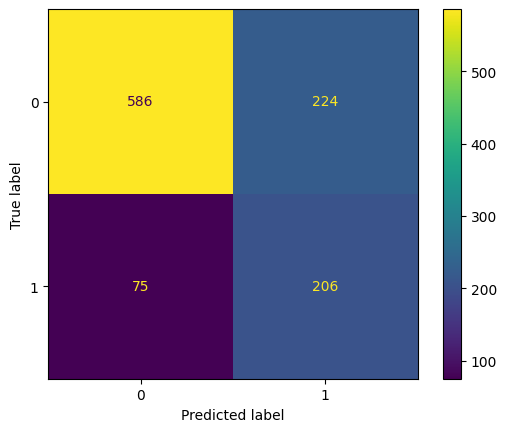

In [281]:
modelo1.fit(x_balanceada,y_balanceada)
y_previsto = modelo1.predict(X_test)
print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);

### Modelo RamdomForetClassifier

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       810
           1       0.51      0.60      0.55       281

    accuracy                           0.75      1091
   macro avg       0.68      0.70      0.69      1091
weighted avg       0.76      0.75      0.75      1091



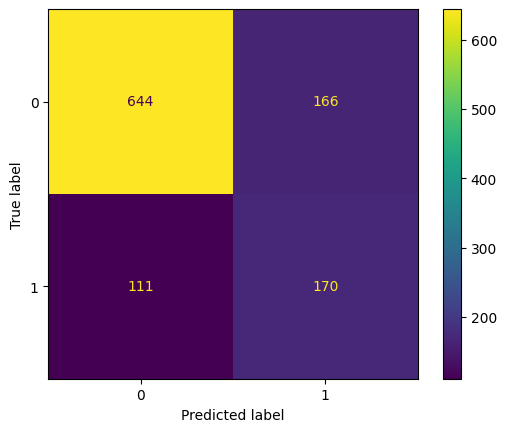

In [282]:
modelo5.fit(x_balanceada,y_balanceada)
y_previsto = modelo5.predict(X_test)
print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);

### En esta evalucaci√≥n de los cinco modelos los reportes de clasificaci√≥n tras aplicar undersampling con NearMiss v3 y evaluar cada modelo sobre el conjunto de prueba (X_test, y_test) son:


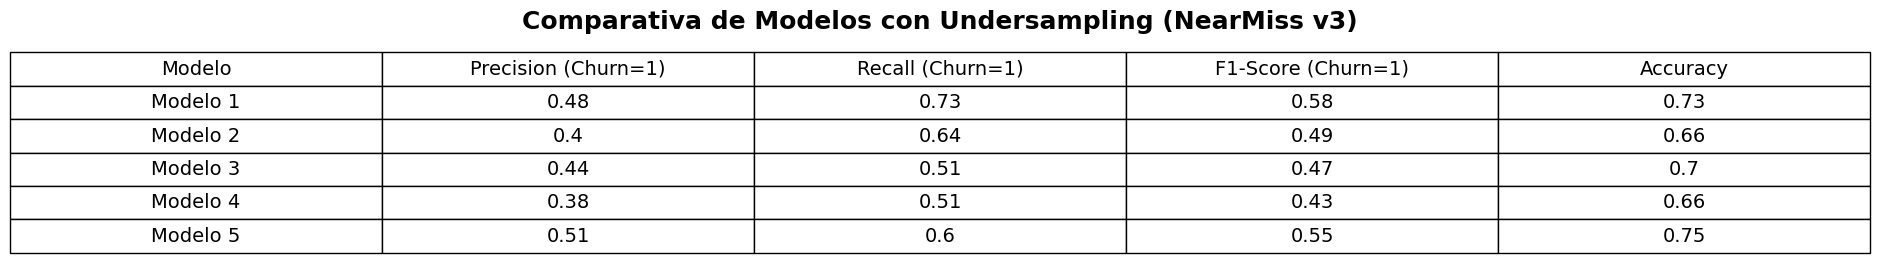

In [283]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear la tabla de resultados
data = {
    'Modelo': ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5'],
    'Precision (Churn=1)': [0.48, 0.40, 0.44, 0.38, 0.51],
    'Recall (Churn=1)':    [0.73, 0.64, 0.51, 0.51, 0.60],
    'F1-Score (Churn=1)':  [0.58, 0.49, 0.47, 0.43, 0.55],
    'Accuracy':            [0.73, 0.66, 0.70, 0.66, 0.75]
}

df = pd.DataFrame(data)

# Mostrar tabla con tama√±o de fuente grande
fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')
tabla = ax.table(cellText=df.values,
                 colLabels=df.columns,
                 cellLoc='center',
                 loc='center')

tabla.auto_set_font_size(False)
tabla.set_fontsize(14)
tabla.scale(2, 2)  # ancho x alto de las celdas

plt.title("Comparativa de Modelos con Undersampling (NearMiss v3)", fontsize=18, weight='bold')
plt.show()


### Evaluaci√≥n tras aplicar Undersampling (NearMiss v3)

Tras aplicar t√©cnicas de **undersampling** para corregir el desbalance de clases en los datos de clientes, se evaluaron cinco modelos de Machine Learning para predecir la **cancelaci√≥n de servicios (Churn)**.

---

### Hallazgos clave

- **Modelo 1**
  - **Recall:** 0.73  
  - Detecta la **mayor cantidad de clientes en riesgo** de cancelar el servicio.  
  - Opci√≥n **agresiva**, adecuada cuando el **costo de no detectar un churner es alto**.

- **Modelo 5**
  - **Precisi√≥n:** 0.51  
  - **Exactitud general:** 0.75  
  - Opci√≥n **conservadora y precisa**, ideal para campa√±as donde se busca **minimizar falsas alarmas** hacia clientes fieles.

### Optimizaci√≥n hiperpar√°metros

In [284]:
TelecomX2.columns


Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total'],
      dtype='object')

In [285]:
len(TelecomX2.columns)

20

In [286]:
import numpy as np
import pandas as pd

# Obtener los coeficientes
coefs = modelo1.coef_[0]
variables = X.columns  # Asumiendo que X es un DataFrame

# Crear DataFrame con resultados
tabla_coef = pd.DataFrame({
    'Variable': variables,
    'Coeficiente': coefs,
    'Odds Ratio': np.exp(coefs),
    'Importancia absoluta': np.abs(coefs)
}).sort_values(by='Importancia absoluta', ascending=False)

# Mostrar top 10
tabla_coef.head(10)


Variable  Coeficiente  Odds Ratio  Importancia absoluta
11       TechSupport    -0.641505    0.526499              0.641505
8     OnlineSecurity    -0.600815    0.548365              0.600815
15  PaperlessBilling     0.513853    1.671721              0.513853
14          Contract    -0.335318    0.715111              0.335318
1      SeniorCitizen     0.292395    1.339632              0.292395
9       OnlineBackup    -0.292311    0.746536              0.292311
7    InternetService     0.275011    1.316546              0.275011
3         Dependents    -0.209623    0.810890              0.209623
16     PaymentMethod    -0.154245    0.857062              0.154245
5       PhoneService    -0.093147    0.911060              0.093147

In [287]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

# Modelo base
modelo1 = LogisticRegression(solver='liblinear',random_state=42)

# Pipeline con NearMiss y modelo
pipeline = imbpipeline([
    ('undersample', NearMiss(version=3)),
    ('logistic', modelo1)
])

# Grid de hiperpar√°metros
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2']
}

# Validaci√≥n cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# GridSearchCV optimizando recall
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring='recall', n_jobs=-1)
grid.fit(X, y)

# Resultados
print("Mejores hiperpar√°metros:", grid.best_params_)
print("Mejor recall promedio:", grid.best_score_)

# Guardar modelo optimizado
import joblib
joblib.dump(grid.best_estimator_, 'champion.pkl')


Mejores hiperpar√°metros: {'logistic__C': 100, 'logistic__penalty': 'l1'}
Mejor recall promedio: 0.7512747257107713


['champion.pkl']

### Conclusi√≥n

### Luego de aplicar t√©cnicas de Optimizaci√≥n de hiperpar√°metros el recall del Modelo 1 tuvo una mejora de 0,75 logrando detectar la mayor cantidad de clientes en riesgo de cancelar el servicio.En consecuencia el Modelo 1 (Regresi√≥n log√≠stica (LogisticRegression)), es el que optimiza mejor la sensibilidad del sistema.


### Insights Finales Basados en la Correlaci√≥n con Churn

#### Factores que Aumentan la Probabilidad de Cancelaci√≥n
1. **Altos Cargos Mensuales (`Charges.Monthly`, +0.19)**  
   Clientes con facturas mensuales m√°s altas tienden a cancelar m√°s, posiblemente por una percepci√≥n de bajo valor en relaci√≥n al costo.

2. **Facturaci√≥n Electr√≥nica (`PaperlessBilling`, +0.19)**  
   Usuarios que reciben facturaci√≥n digital presentan mayor churn. Puede estar vinculado a perfiles m√°s j√≥venes y digitales, propensos a cambiar de proveedor.

3. **Adultos Mayores (`SeniorCitizen`, +0.15)**  
   Ligeramente m√°s propensos a cancelar, probablemente por ingresos fijos o menor afinidad con servicios tecnol√≥gicos.

4. **Servicios de Streaming (`StreamingTV` / `StreamingMovies`, +0.06)**  
   Tener estos servicios no garantiza permanencia. Puede reflejar usuarios exigentes o acostumbrados a comparar.

5. **M√∫ltiples L√≠neas (`MultipleLines`, +0.04)**  
   No se asocia fuertemente con retenci√≥n. Tal vez sea un servicio f√°cilmente reemplazable por promociones de la competencia.

---

#### Factores que Disminuyen la Probabilidad de Cancelaci√≥n
1. **Antig√ºedad del Cliente (`tenure`, ‚Äì0.34)**  
   A mayor tiempo con la empresa, menor probabilidad de baja. Es fundamental trabajar la retenci√≥n en los primeros meses.

2. **Tipo de Contrato (`Contract`, ‚Äì0.33)**  
   Contratos a plazo fijo (anual, bianual) reducen significativamente el churn, indicando compromiso y fidelidad.

3. **Tipo de Internet (`InternetService`, ‚Äì0.31)**  
   Servicios de mejor calidad (como fibra √≥ptica) est√°n asociados con menor churn. La calidad del servicio es clave.

4. **M√©todo de Pago (`PaymentMethod`, ‚Äì0.26)**  
   M√©todos como d√©bito autom√°tico muestran menor tasa de cancelaci√≥n, indicando estabilidad financiera o menor fricci√≥n.

5. **Gasto Total (`Charges.Total`, ‚Äì0.19)**  
   Clientes que ya han invertido m√°s en la empresa tienden a quedarse, debido al ‚Äúefecto inversi√≥n‚Äù o ‚Äúcostos hundidos‚Äù.

6. **Servicios de Valor Agregado (`OnlineSecurity`, `TechSupport`, ‚Äì0.16)**  
   Mejoran la percepci√≥n de calidad y satisfacci√≥n, favoreciendo la retenci√≥n.

7. **V√≠nculos Personales (`Partner`, `Dependents`, ‚Äì0.15)**  
   Clientes con familia o pareja tienen menor churn, posiblemente por mayor estabilidad o decisiones compartidas.

---

### Recomendaciones Estrat√©gicas
- **Fidelizar a nuevos clientes durante los primeros meses**, con beneficios personalizados o atenci√≥n diferencial.  
- **Promover contratos a largo plazo**, mediante descuentos, promociones exclusivas o mejoras en el servicio.  
- **Fomentar m√©todos de pago autom√°ticos**, ofreciendo incentivos para reducir cancelaciones por olvido o problemas administrativos.  
- **Detectar clientes con altos cargos mensuales** y ofrecerles mejoras o bonificaciones personalizadas.  
- **Ofrecer servicios de valor agregado**, como seguridad en l√≠nea o soporte t√©cnico premium, para fidelizaci√≥n.  
- **Segmentar campa√±as de retenci√≥n** seg√∫n tipo de cliente (edad, perfil digital, estado civil, presencia de dependientes).  